In [1]:
import json
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [7]:
with open("data/sarcasm/sarcasm.json", 'r') as f:
    datastore = json.load(f)

#Initialze the lists
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

print(len(sentences))
# print(labels[0])


26709


In [5]:
TRAINING_SIZE = 20000

VOCAB_SIZE = 10000

MAX_LENGTH = 32

EMBEDDING_DIM = 16

In [8]:
training_sentences = sentences[0:TRAINING_SIZE]
training_labels = labels[0:TRAINING_SIZE]
test_sentences = sentences[TRAINING_SIZE:]
test_labels = labels[TRAINING_SIZE:]

In [9]:
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)
vectorize_layer.adapt(training_sentences)

In [13]:
train_sequences = vectorize_layer(training_sentences)
test_sequences = vectorize_layer(test_sentences)

print(training_sentences[0])
print(train_sequences[0])

former versace store clerk sues over secret 'black code' for minority shoppers
tf.Tensor(
[ 319    1  943 4079 2366   47  366   94 2026    6 2653 9470    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0], shape=(32,), dtype=int64)


In [15]:
train_dataset_vectorized = tf.data.Dataset.from_tensor_slices((train_sequences, training_labels))
test_dataset_vectorized = tf.data.Dataset.from_tensor_slices((test_sequences, test_labels))

In [17]:
for ex in train_dataset_vectorized.take(1):
    print(ex)

(<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([ 319,    1,  943, 4079, 2366,   47,  366,   94, 2026,    6, 2653,
       9470,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


2026-02-16 20:23:31.301172: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
SHUFFLE_BATCH_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

train_dataset_final = (train_dataset_vectorized
.cache()
.shuffle(SHUFFLE_BATCH_SIZE)
.batch(BATCH_SIZE)
.prefetch(PREFETCH_BUFFER_SIZE))

test_dataset_final = (test_dataset_vectorized
.cache()
.batch(BATCH_SIZE)
.prefetch(PREFETCH_BUFFER_SIZE))

In [19]:
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

sample_array = np.array([[[1, 2], [3, 4]]])

print(f'shape of sample array = {sample_array.shape}')

print(f'sample array: {sample_array}')

output = gap1d_layer(sample_array)

print(f'output shape of gap1d layer: {output.shape}')
print(f'output array of gap1d layer: {output.numpy}')

shape of sample array = (1, 2, 2)
sample array: [[[1 2]
  [3 4]]]
output shape of gap1d layer: (1, 2)
output array of gap1d layer: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 3.]], dtype=float32)>>


In [20]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LENGTH, )),
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 32, 16)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,433 (626.69 KB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
num_epochs=10

history = model.fit(train_dataset_final, epochs=num_epochs, validation_data=test_dataset_final, verbose=2)


Epoch 1/10
625/625 - 1s - 1ms/step - accuracy: 0.6988 - loss: 0.5752 - val_accuracy: 0.8062 - val_loss: 0.4341
Epoch 2/10
625/625 - 0s - 591us/step - accuracy: 0.8519 - loss: 0.3557 - val_accuracy: 0.8423 - val_loss: 0.3640
Epoch 3/10
625/625 - 0s - 586us/step - accuracy: 0.8899 - loss: 0.2776 - val_accuracy: 0.8512 - val_loss: 0.3475
Epoch 4/10
625/625 - 0s - 577us/step - accuracy: 0.9116 - loss: 0.2291 - val_accuracy: 0.8511 - val_loss: 0.3494
Epoch 5/10
625/625 - 0s - 574us/step - accuracy: 0.9262 - loss: 0.1970 - val_accuracy: 0.8432 - val_loss: 0.3745
Epoch 6/10
625/625 - 0s - 573us/step - accuracy: 0.9380 - loss: 0.1678 - val_accuracy: 0.8419 - val_loss: 0.3988
Epoch 7/10
625/625 - 0s - 572us/step - accuracy: 0.9453 - loss: 0.1507 - val_accuracy: 0.8155 - val_loss: 0.4960
Epoch 8/10
625/625 - 0s - 573us/step - accuracy: 0.9524 - loss: 0.1353 - val_accuracy: 0.8322 - val_loss: 0.4541
Epoch 9/10
625/625 - 0s - 576us/step - accuracy: 0.9570 - loss: 0.1233 - val_accuracy: 0.8383 - va

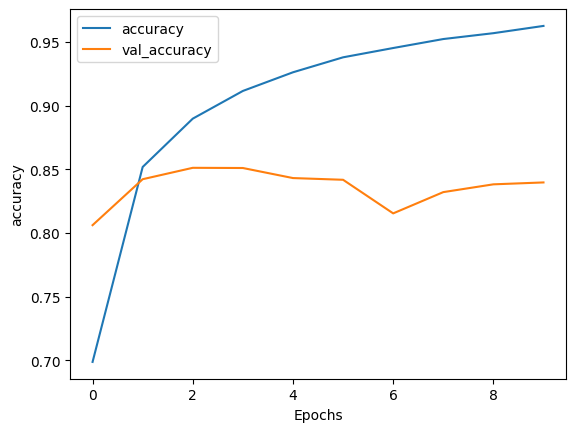

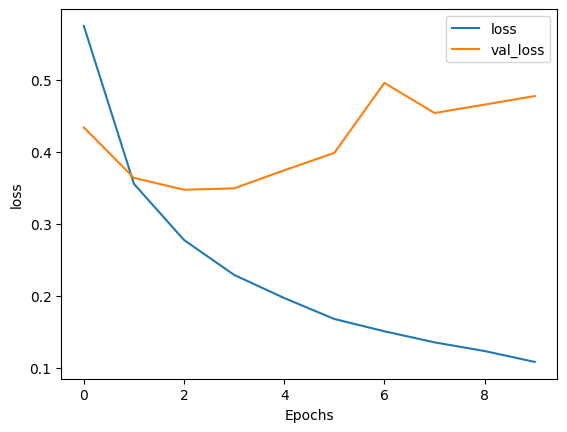

In [25]:
#Plot utility
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graph(history, 'accuracy')
plot_graph(history, 'loss')